# Medical Insurance Price Prediction 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading the dataset

In [2]:
df=pd.read_csv("C:\\Users\\vishal tupe\\Desktop\\ML CA1\\medical_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


### Exploratory Data Analysis (EDA)

In [4]:
df.shape

(2772, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
print(df['age'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


In [10]:
df['smoker'].value_counts()


smoker
no     2208
yes     564
Name: count, dtype: int64

In [11]:
df['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [12]:
df['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

### Data analysis

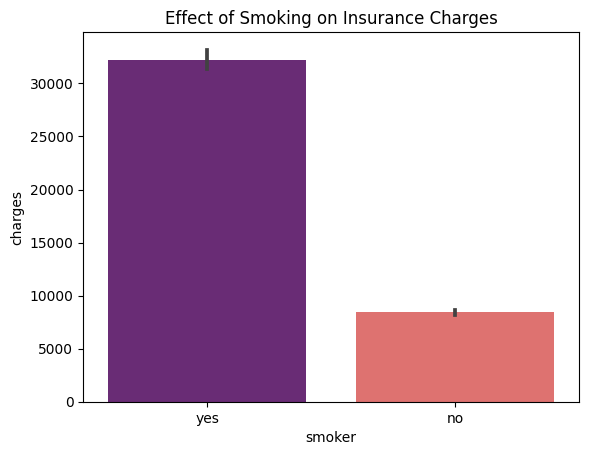

In [13]:
sns.barplot(x='smoker', y='charges', data=df, palette='magma')
plt.title("Effect of Smoking on Insurance Charges")
plt.show() #Smokers generally have higher insurance costs than non-smokers.

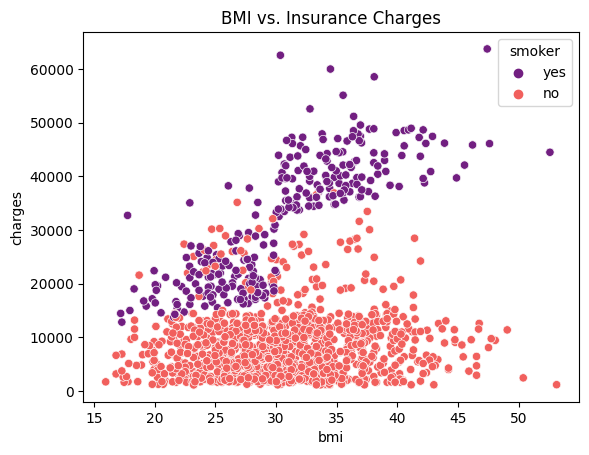

<Figure size 1600x900 with 0 Axes>

In [14]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df,palette='magma')
plt.title("BMI vs. Insurance Charges")
plt.figure(figsize=(16,9))

plt.show() # Higher BMI may lead to higher charges, especially for smokers.

<Axes: xlabel='region', ylabel='charges'>

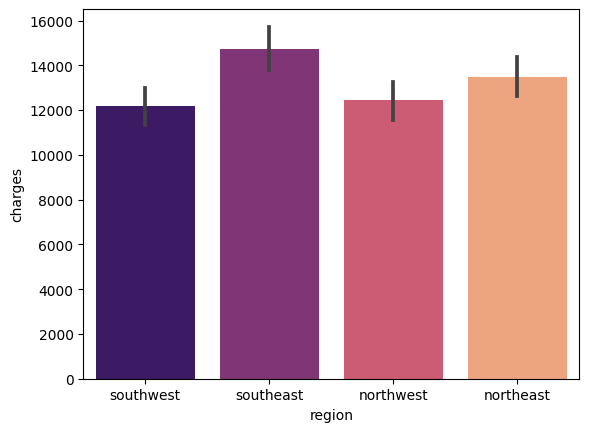

In [15]:
sns.barplot(x=df['region'],y=df['charges'], palette='magma')

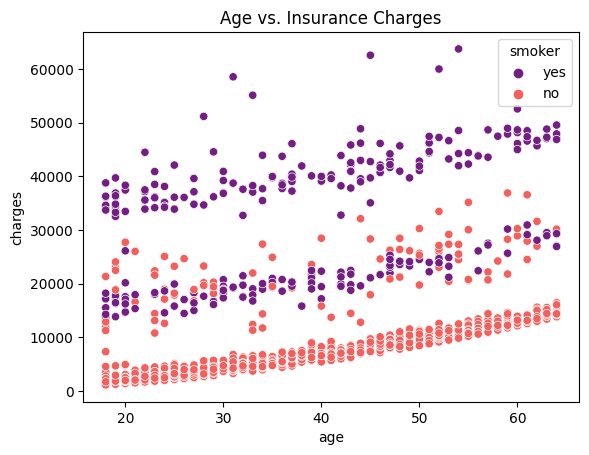

In [16]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df,palette='magma')
plt.title("Age vs. Insurance Charges")
plt.show()  #Older individuals have higher medical insurance costs.

Text(0.5, 1.0, 'Charges region and sexwise')

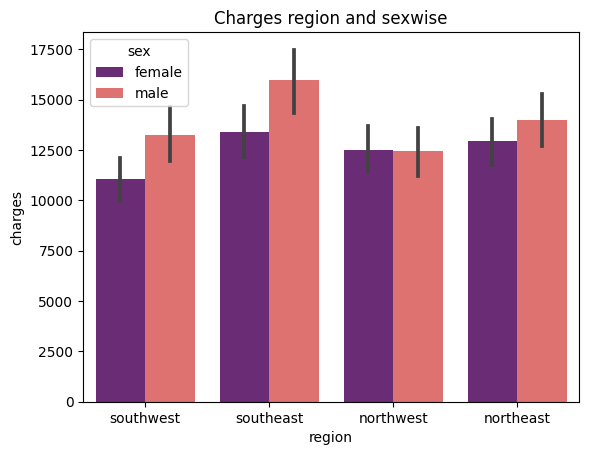

In [17]:
sns.barplot(x=df['region'],y=df['charges'],hue=df['sex'],palette='magma')
plt.title("Charges region and sexwise")

Text(0.5, 1.0, 'Smokers rate sex and insurance ')

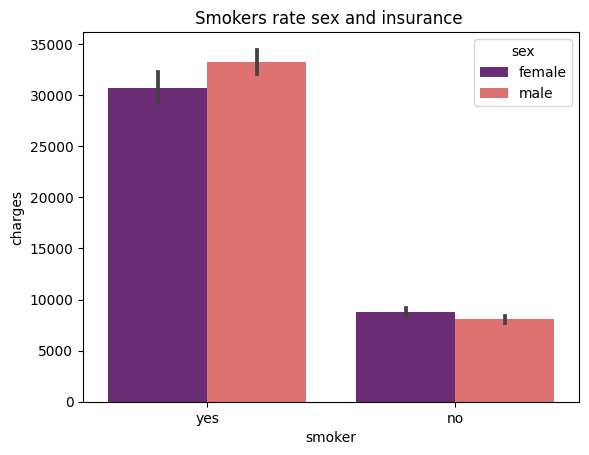

In [18]:
sns.barplot(x='smoker',y='charges',data=df,palette='magma',hue='sex')
plt.title("Smokers rate sex and insurance ")

<Axes: ylabel='count'>

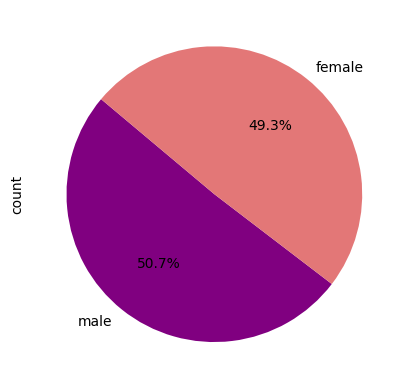

In [19]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['purple','#E37777'])


<Axes: ylabel='count'>

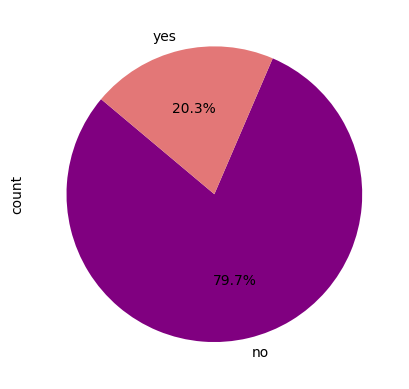

In [20]:
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['purple','#E37777'])


<Axes: ylabel='count'>

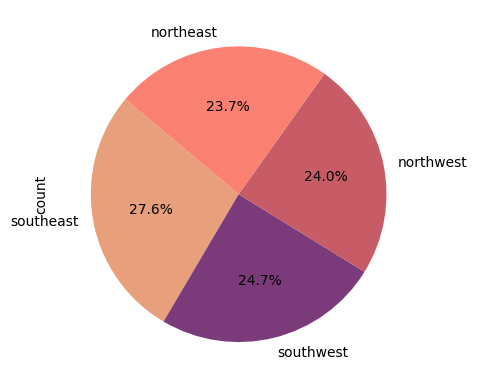

In [21]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#E8A07C','#7B3A7A','#C75C66','Salmon'])


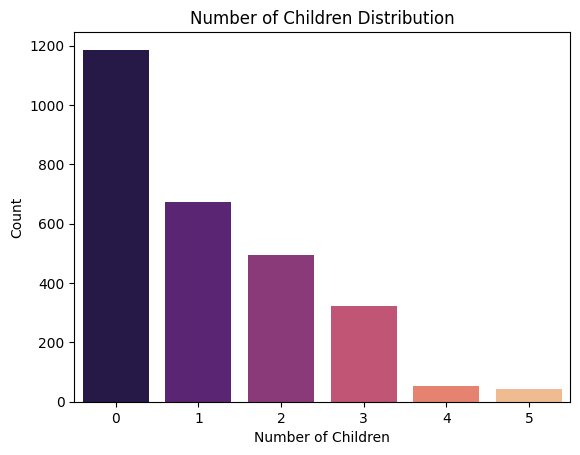

In [22]:
sns.countplot(x='children', data=df, palette='magma')
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

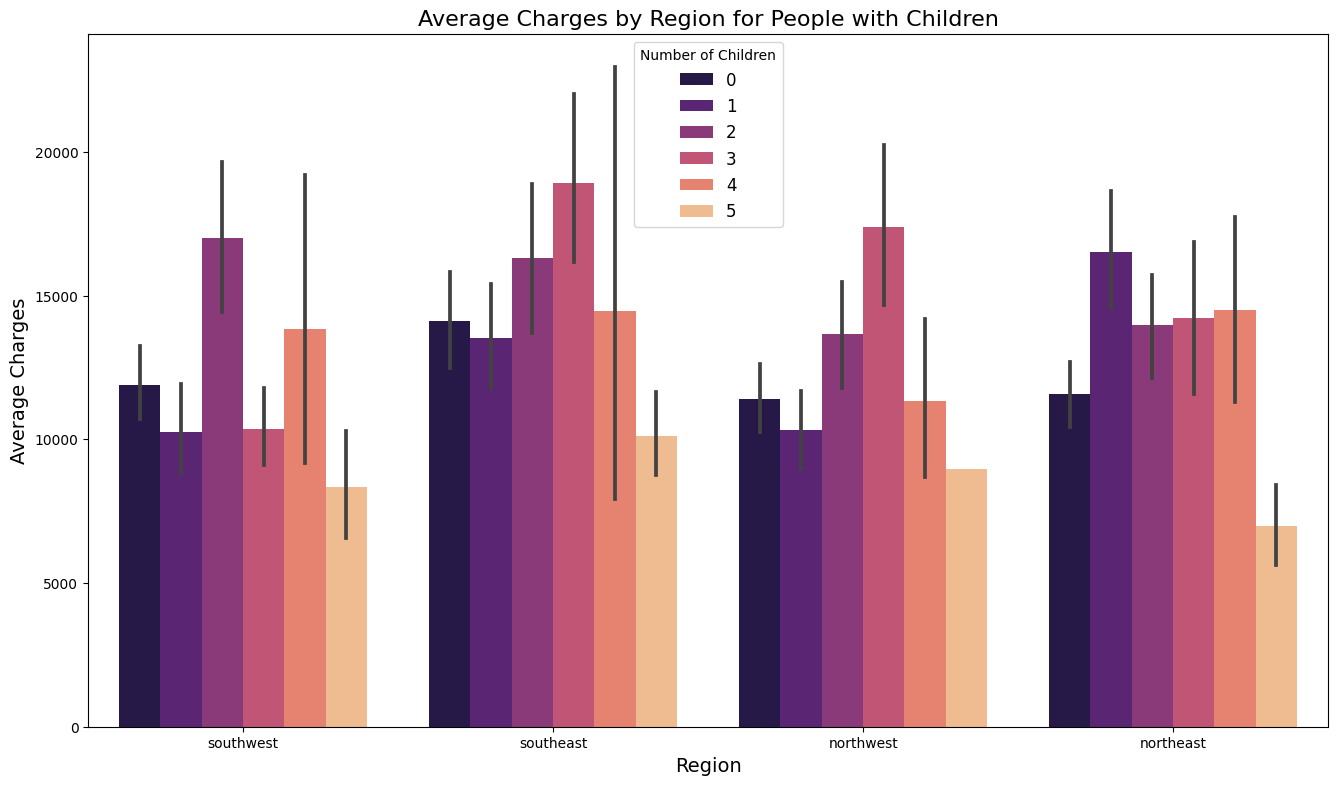

In [23]:
plt.figure(figsize=(16, 9))  # Set figure size to 16x9
sns.barplot(x='region', y='charges', hue='children', data=df, palette='magma')
plt.title('Average Charges by Region for People with Children', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.legend(title='Number of Children', fontsize=12)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score+
from sklearn.model_selection import train_test_split, cross_val_score


In [55]:
df.replace({
    'sex': {'male': 0, 'female': 1},
    'smoker': {'yes': 0, 'no': 1},
    'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}
}, inplace=True)

In [56]:
df['age_bmi'] = df['age'] * df['bmi']
df['smoker_age'] = df['smoker'] * df['age']
df['bmi_children'] = df['bmi'] * df['children']

In [57]:
X = df.drop(columns='charges')
y = df['charges']

In [58]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=7),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=4),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
}


# Fitting the model & performance evaluation

In [94]:
model_scores = {}
predictions = {}

#Fit and Predict
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred 

# Calculate R² Scores
for name, y_pred in predictions.items():
    score = r2_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} = R²_Score: {score:.4f}")

Linear Regression = R²_Score: 0.7401
Random Forest = R²_Score: 0.8969
Gradient Boosting = R²_Score: 0.9230
XGBoost = R²_Score: 0.8928


In [69]:
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with R² = {model_scores[best_model_name]:.4f}")


 Best Model: Gradient Boosting with R² = 0.9234


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the best model
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9234


In [71]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1697.60
Mean Squared Error (MSE): 11750683.53
Root Mean Squared Error (RMSE): 3427.93


In [80]:
import pickle as pkl

pkl.dump(model, open('MIPML.pkl','wb'))

In [81]:
import joblib

# After training your model
joblib.dump(model, 'MIPML.pkl')


['MIPML.pkl']

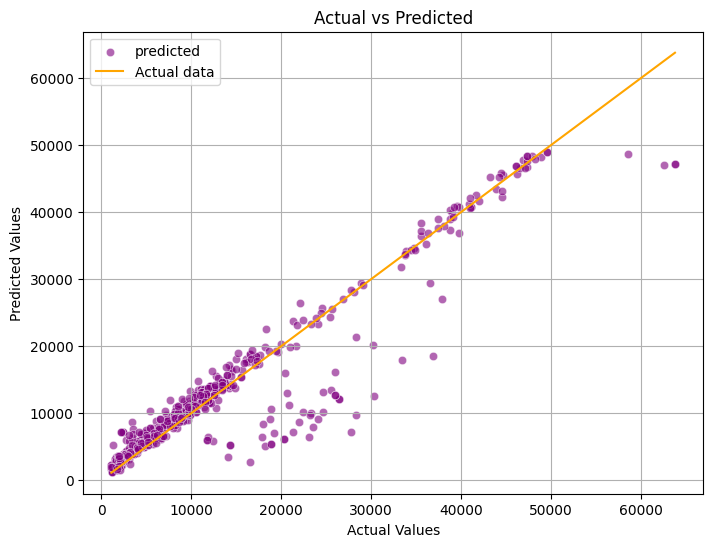

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = model.predict(X_test) 
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_plot, color='purple', alpha=0.6,label='predicted')
sns.lineplot(x='Actual', y='Actual', data=df_plot, color='orange', label='Actual data')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
